**First we work with cifar10 prepared by keras**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_data, y1), (test_data, y2) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
#Creating CNN model
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         1

In [ ]:
#Configuring the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Labeling in one hot labeling method
train_labels = to_categorical(y1)
test_labels = to_categorical(y2)
del y1, y2

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    batch_size=32,
                    epochs=70,
                    validation_data=(test_data, test_labels))

Epoch 1/70
1563/1563 [==============================] - 20s 6ms/step - loss: 2.0059 - acc: 0.2832 - val_loss: 1.5995 - val_acc: 0.4149
Epoch 2/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5672 - acc: 0.4306 - val_loss: 1.4010 - val_acc: 0.5001
Epoch 3/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4031 - acc: 0.4968 - val_loss: 1.3715 - val_acc: 0.5262
Epoch 4/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2911 - acc: 0.5443 - val_loss: 1.1607 - val_acc: 0.5903
Epoch 5/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1964 - acc: 0.5820 - val_loss: 1.1745 - val_acc: 0.5960
Epoch 6/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1287 - acc: 0.6071 - val_loss: 1.0632 - val_acc: 0.6315
Epoch 7/70
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0677 - acc: 0.6296 - val_loss: 1.0325 - val_acc: 0.6412
Epoch 8/70
1563/1563 [==============================] - 12s 7

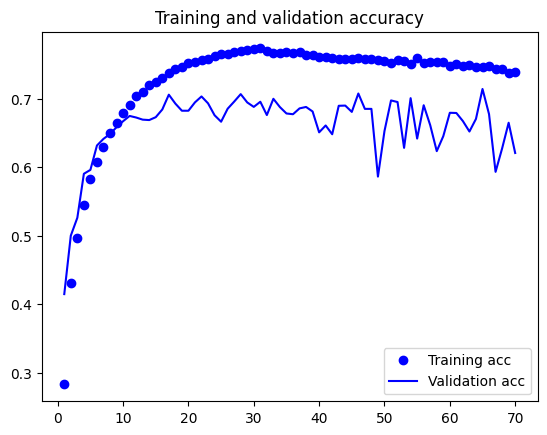

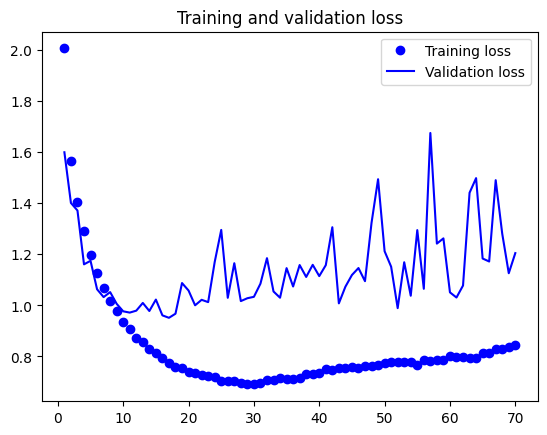

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(test_data,
                       test_labels,
                       batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 1.2047 - acc: 0.6206


In [ ]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.2046699523925781, 0.6205999851226807]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
       rescale=1./255)
#       rotation_range=40,
#       brightness_range=(0.2, 0.8),
#       width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#       height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_data[:40000], train_labels[:40000], batch_size=20)
validation_generator = validation_datagen.flow(train_data[40000:], train_labels[40000:], batch_size=20)

In [ ]:
#Defining a new convnet that includes dropout
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
#    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator)
#    validation_steps=50)

Epoch 1/30


<ipython-input-23-faadb51e3a65>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


2000/2000 [==============================] - 18s 8ms/step - loss: 1.8292 - acc: 0.3226 - val_loss: 1.6424 - val_acc: 0.4105
Epoch 2/30
2000/2000 [==============================] - 14s 7ms/step - loss: 1.4916 - acc: 0.4538 - val_loss: 1.4355 - val_acc: 0.4856
Epoch 3/30
2000/2000 [==============================] - 15s 7ms/step - loss: 1.3414 - acc: 0.5132 - val_loss: 1.2998 - val_acc: 0.5327
Epoch 4/30
2000/2000 [==============================] - 14s 7ms/step - loss: 1.2327 - acc: 0.5597 - val_loss: 1.2029 - val_acc: 0.5693
Epoch 5/30
2000/2000 [==============================] - 15s 7ms/step - loss: 1.1400 - acc: 0.5940 - val_loss: 1.0996 - val_acc: 0.6132
Epoch 6/30
2000/2000 [==============================] - 14s 7ms/step - loss: 1.0687 - acc: 0.6217 - val_loss: 1.1083 - val_acc: 0.6121
Epoch 7/30
2000/2000 [==============================] - 15s 7ms/step - loss: 1.0070 - acc: 0.6452 - val_loss: 1.0184 - val_acc: 0.6405
Epoch 8/30
2000/2000 [==============================] - 16s 8ms/st

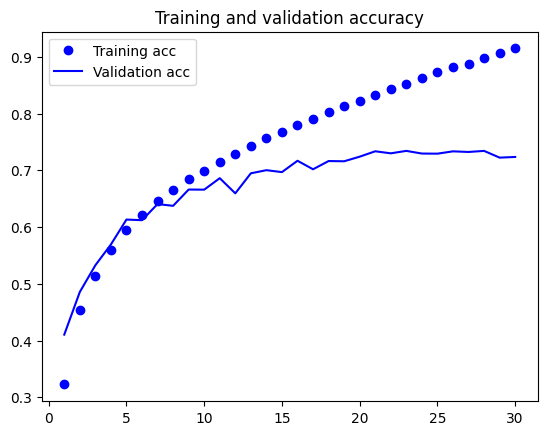

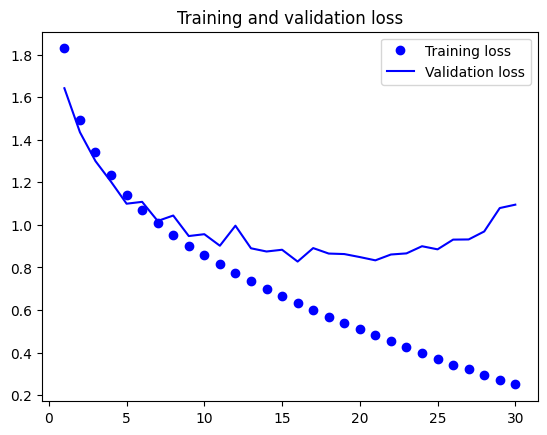

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(test_data,
                       test_labels,
                       batch_size=20)

500/500 [==============================] - 3s 4ms/step - loss: 380.5209 - acc: 0.5519


In [ ]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[380.5209045410156, 0.5519000291824341]


**Second we work with original data from kaggle to do the Fine-Tuning**

In [1]:
from google.colab import files

# Upload the Kaggle API key (kaggle.json) using the "files" module
files.upload()
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c cifar-10

Saving kaggle.json to kaggle.json
100% 713M/715M [00:08<00:00, 44.5MB/s]
100% 715M/715M [00:08<00:00, 90.9MB/s]


In [2]:
import os
import numpy as np

original_dataset_dir = '/content/orginal'
os.mkdir(original_dataset_dir)
base_dir = '/content/base'
os.mkdir(base_dir)
#Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
#Directory with training cat pictures
train_automobile_dir = os.path.join(train_dir, 'automobile')
os.mkdir(train_automobile_dir)

train_bird_dir = os.path.join(train_dir, 'bird')
os.mkdir(train_bird_dir)

train_cat_dir = os.path.join(train_dir, 'cat')
os.mkdir(train_cat_dir)

train_deer_dir = os.path.join(train_dir, 'deer')
os.mkdir(train_deer_dir)

train_dog_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_dog_dir)

train_frog_dir = os.path.join(train_dir, 'frog')
os.mkdir(train_frog_dir)

train_horse_dir = os.path.join(train_dir, 'horse')
os.mkdir(train_horse_dir)

train_ship_dir = os.path.join(train_dir, 'ship')
os.mkdir(train_ship_dir)

train_truck_dir = os.path.join(train_dir, 'truck')
os.mkdir(train_truck_dir)

train_airplane_dir = os.path.join(train_dir, 'airplane')
os.mkdir(train_airplane_dir)

#Directory with validation cat pics
validation_automobile_dir = os.path.join(validation_dir, 'automobile')
os.mkdir(validation_automobile_dir)

validation_bird_dir = os.path.join(validation_dir, 'bird')
os.mkdir(validation_bird_dir)

validation_cat_dir = os.path.join(validation_dir, 'cat')
os.mkdir(validation_cat_dir)

validation_deer_dir = os.path.join(validation_dir, 'deer')
os.mkdir(validation_deer_dir)

validation_dog_dir = os.path.join(validation_dir, 'dog')
os.mkdir(validation_dog_dir)

validation_frog_dir = os.path.join(validation_dir, 'frog')
os.mkdir(validation_frog_dir)

validation_horse_dir = os.path.join(validation_dir, 'horse')
os.mkdir(validation_horse_dir)

validation_ship_dir = os.path.join(validation_dir, 'ship')
os.mkdir(validation_ship_dir)

validation_truck_dir = os.path.join(validation_dir, 'truck')
os.mkdir(validation_truck_dir)

validation_airplane_dir = os.path.join(validation_dir, 'airplane')
os.mkdir(validation_airplane_dir)

In [3]:
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [4]:
!7z e /content/train.7z -oc:/content/orginal
#!7z e /content/test.7z -oc:/content/test


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      1%      2%      2% - train/1.png                    2% 771 - train/10692.png                            2% 1138 - train/11021.png                             2% 1426 - train/11281.png                             2% 1676 - train/11506.png 

In [5]:
import pandas as pd

data = pd.read_csv('/content/trainLabels.csv')
data = np.array(data)

In [6]:
train_labels = np.empty([len(data)], dtype=int)
for i in range (len(data)):
  if data[i,1] == 'automobile':
    train_labels[i] = 1
  elif data[i,1] == 'bird':
    train_labels[i] = 2
  elif data[i,1] == 'cat':
    train_labels[i] = 3
  elif data[i,1] == 'deer':
    train_labels[i] = 4
  elif data[i,1] == 'dog':
    train_labels[i] = 5
  elif data[i,1] == 'frog':
    train_labels[i] = 6
  elif data[i,1] == 'horse':
    train_labels[i] = 7
  elif data[i,1] == 'ship':
    train_labels[i] = 8
  elif data[i,1] == 'truck':
    train_labels[i] = 9
  elif data[i,1] == 'airplane':
    train_labels[i] = 0

In [7]:
import shutil

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0
j = 0
fnames = ['{}.png'.format(i) for i in range(1, 50001)]
for fname in fnames:
  if train_labels[j] == 1:
    if count1 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_automobile_dir, fname)
      shutil.copyfile(src, dst)
      count1 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_automobile_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 2:
    if count2 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_bird_dir, fname)
      shutil.copyfile(src, dst)
      count2 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_bird_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 3:
    if count3 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_cat_dir, fname)
      shutil.copyfile(src, dst)
      count3 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_cat_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 4:
    if count4 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_deer_dir, fname)
      shutil.copyfile(src, dst)
      count4 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_deer_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 5:
    if count5 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_dog_dir, fname)
      shutil.copyfile(src, dst)
      count5 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_dog_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 6:
    if count6 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_frog_dir, fname)
      shutil.copyfile(src, dst)
      count6 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_frog_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 7:
    if count7 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_horse_dir, fname)
      shutil.copyfile(src, dst)
      count7 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_horse_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 8:
    if count8 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_ship_dir, fname)
      shutil.copyfile(src, dst)
      count8 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_ship_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 9:
    if count9 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_truck_dir, fname)
      shutil.copyfile(src, dst)
      count9 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_truck_dir, fname)
      shutil.copyfile(src, dst)
#
  if train_labels[j] == 0:
    if count10 < 4000:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(train_airplane_dir, fname)
      shutil.copyfile(src, dst)
      count10 += 1
    else:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(validation_airplane_dir, fname)
      shutil.copyfile(src, dst)
  j += 1

In [8]:
from tensorflow.keras.utils import to_categorical

train_label = to_categorical(train_labels, num_classes=10)
del train_labels, data

In [9]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

#Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#Note that the validation data shouldn't be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                  #Target dircetory
    target_size=(150, 150),     #Resize all images to 150 x 150
    batch_size=20,
    class_mode='categorical')        #Because you use binary_crossentropy
                                #loss, you need binary labels.
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-10-cf9449c2d169>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 25s 135ms/step - loss: 2.2231 - acc: 0.1530 - val_loss: 2.1058 - val_acc: 0.2020
Epoch 2/100
100/100 [==============================] - 13s 130ms/step - loss: 2.1091 - acc: 0.1970 - val_loss: 2.0199 - val_acc: 0.2620
Epoch 3/100
100/100 [==============================] - 13s 131ms/step - loss: 2.0797 - acc: 0.2170 - val_loss: 1.9891 - val_acc: 0.2660
Epoch 4/100
100/100 [==============================] - 13s 130ms/step - loss: 2.0287 - acc: 0.2425 - val_loss: 1.9059 - val_acc: 0.3080
Epoch 5/100
100/100 [==============================] - 13s 130ms/step - loss: 1.9598 - acc: 0.2690 - val_loss: 1.9110 - val_acc: 0.2970
Epoch 6/100
100/100 [==============================] - 13s 131ms/step - loss: 1.9464 - acc: 0.2810 - val_loss: 1.8074 - val_acc: 0.3540
Epoch 7/100
100/100 [==============================] - 13s 131ms/step - loss: 1.9178 - acc: 0.2995 - val_loss: 1.7453 - val_acc: 0.3540
Epoch 8/100
100/100 [===========================

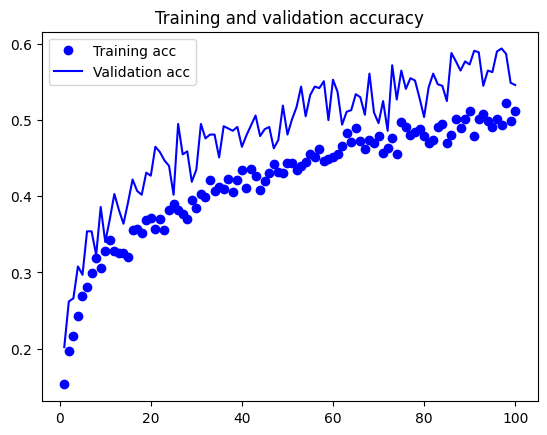

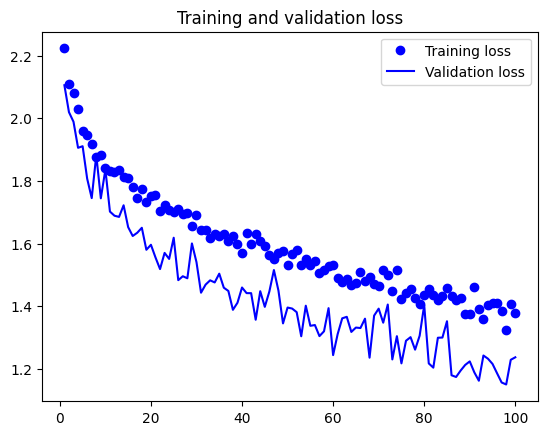

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

In [13]:
conv_base = VGG16(weights='imagenet',
                               include_top=False,
                              input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
conv_base.trainable = False

In [15]:
#Adding a densely connected classifier on top of the convolutional base
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable= False

#Training the model end to end with a frozen convolutional base
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#Note that the validation data shouldn't be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator= test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


<ipython-input-17-cc3b85ccc5e8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 19s 159ms/step - loss: 2.2575 - acc: 0.1710 - val_loss: 2.1960 - val_acc: 0.1770
Epoch 2/30
100/100 [==============================] - 18s 182ms/step - loss: 2.1062 - acc: 0.2595 - val_loss: 2.0845 - val_acc: 0.2580
Epoch 3/30
100/100 [==============================] - 16s 157ms/step - loss: 2.0075 - acc: 0.3090 - val_loss: 1.9978 - val_acc: 0.2970
Epoch 4/30
100/100 [==============================] - 16s 158ms/step - loss: 1.9174 - acc: 0.3515 - val_loss: 1.9447 - val_acc: 0.3150
Epoch 5/30
100/100 [==============================] - 21s 212ms/step - loss: 1.8484 - acc: 0.3790 - val_loss: 1.8701 - val_acc: 0.3870
Epoch 6/30
100/100 [==============================] - 18s 176ms/step - loss: 1.7992 - acc: 0.3930 - val_loss: 1.8235 - val_acc: 0.3960
Epoch 7/30
100/100 [==============================] - 18s 181ms/step - loss: 1.7491 - acc: 0.4005 - val_loss: 1.7922 - val_acc: 0.4030
Epoch 8/30
100/100 [==============================] - 16s 164ms/st

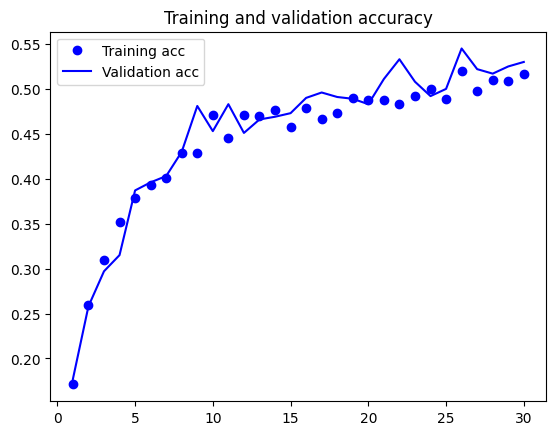

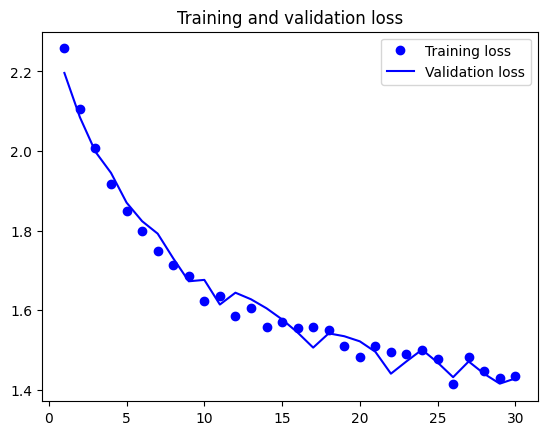

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
#Freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#Fine-tuning the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [20]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


<ipython-input-20-6900428ca845>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


2000/2000 [==============================] - 284s 141ms/step - loss: 1.1245 - acc: 0.6098 - val_loss: 0.8684 - val_acc: 0.6960
Epoch 2/30
2000/2000 [==============================] - 278s 139ms/step - loss: 0.9083 - acc: 0.6816 - val_loss: 0.6800 - val_acc: 0.7670
Epoch 3/30
2000/2000 [==============================] - 280s 140ms/step - loss: 0.8152 - acc: 0.7172 - val_loss: 0.6933 - val_acc: 0.7660
Epoch 4/30
2000/2000 [==============================] - 278s 139ms/step - loss: 0.7528 - acc: 0.7378 - val_loss: 0.7096 - val_acc: 0.7630
Epoch 5/30
2000/2000 [==============================] - 281s 140ms/step - loss: 0.7056 - acc: 0.7546 - val_loss: 0.7197 - val_acc: 0.7600
Epoch 6/30
2000/2000 [==============================] - 282s 141ms/step - loss: 0.6706 - acc: 0.7669 - val_loss: 0.5932 - val_acc: 0.7950
Epoch 7/30
2000/2000 [==============================] - 277s 138ms/step - loss: 0.6357 - acc: 0.7783 - val_loss: 0.5544 - val_acc: 0.8100
Epoch 8/30
2000/2000 [=======================

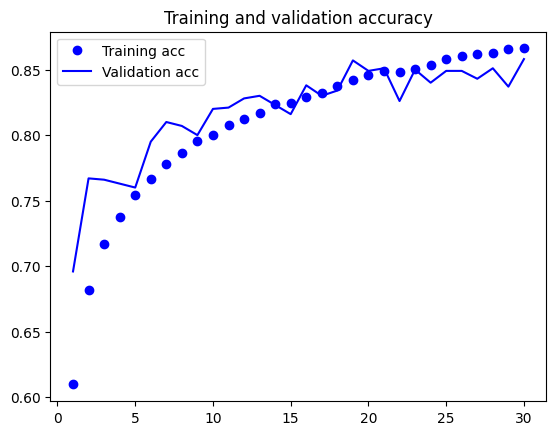

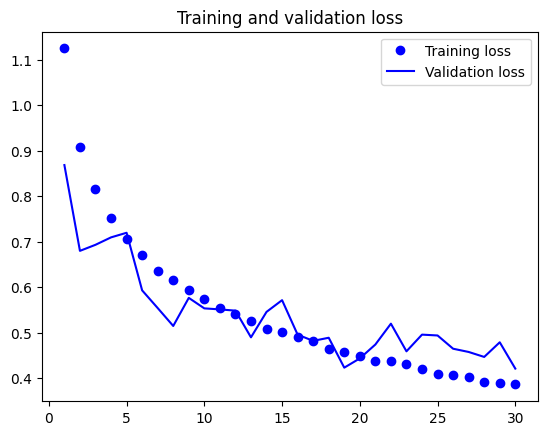

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()